In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read dataset

In [2]:
df = pd.read_csv('C:/Users/sergi/PycharmProjects/RepasoIA/dirtyCafeSales/data/dirty_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


### Show different features in dataset

In [3]:
# Information general of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


### Data unique in columns

In [4]:
for column in df.columns:
    
    array = df[column].unique()
    print(f'{column}: {array}\n{100*"-"}')

Transaction ID: ['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
----------------------------------------------------------------------------------------------------
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
----------------------------------------------------------------------------------------------------
Quantity: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
----------------------------------------------------------------------------------------------------
Price Per Unit: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
----------------------------------------------------------------------------------------------------
Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
----------------------------------------------------------------------------------------------------
Payment Meth

### Filter data without nan data

Half of the data is removed by removing the nan data

In [5]:
df_without_nan = df.dropna(how='any')
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4550 non-null   object
 1   Item              4550 non-null   object
 2   Quantity          4550 non-null   object
 3   Price Per Unit    4550 non-null   object
 4   Total Spent       4550 non-null   object
 5   Payment Method    4550 non-null   object
 6   Location          4550 non-null   object
 7   Transaction Date  4550 non-null   object
dtypes: object(8)
memory usage: 319.9+ KB


In [6]:
for column in df.columns:
    
    array = df_without_nan[column].unique()
    print(f'{column}: {array}\n{100*"-"}')

Transaction ID: ['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_3897619' 'TXN_2739140'
 'TXN_6170729']
----------------------------------------------------------------------------------------------------
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'UNKNOWN' 'Sandwich' 'Juice' 'Smoothie'
 'ERROR' 'Tea']
----------------------------------------------------------------------------------------------------
Quantity: ['2' '4' '3' '5' 'ERROR' '1' 'UNKNOWN']
----------------------------------------------------------------------------------------------------
Price Per Unit: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' 'UNKNOWN' 'ERROR']
----------------------------------------------------------------------------------------------------
Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '9.0' '16.0' '25.0' '8.0' '15.0' '6.0' '20.0'
 '5.0' '2.0' '3.0' '1.0' 'UNKNOWN' '7.5' '4.5' '1.5']
----------------------------------------------------------------------------------------------------
Payment Method: ['Credit Car

### Filter data without ERROR


In [7]:
mask = df.apply(lambda row: row.astype(str).str.contains('ERROR').any(), axis=1)
df_without_error = df[~mask]
df_without_error.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8480 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    8480 non-null   object
 1   Item              8193 non-null   object
 2   Quantity          8361 non-null   object
 3   Price Per Unit    8324 non-null   object
 4   Total Spent       8326 non-null   object
 5   Payment Method    6222 non-null   object
 6   Location          5620 non-null   object
 7   Transaction Date  8338 non-null   object
dtypes: object(8)
memory usage: 596.2+ KB


In [8]:
for column in df.columns:
    
    array = df_without_error[column].unique()
    print(f'{column}: {array}\n{100*"-"}')

Transaction ID: ['TXN_1961373' 'TXN_4977031' 'TXN_7034554' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
----------------------------------------------------------------------------------------------------
Item: ['Coffee' 'Cake' 'Salad' 'Smoothie' 'Sandwich' nan 'Cookie' 'Juice'
 'UNKNOWN' 'Tea']
----------------------------------------------------------------------------------------------------
Quantity: ['2' '4' '5' '3' '1' 'UNKNOWN' nan]
----------------------------------------------------------------------------------------------------
Price Per Unit: ['2.0' '3.0' '5.0' '4.0' '1.0' '1.5' nan 'UNKNOWN']
----------------------------------------------------------------------------------------------------
Total Spent: ['4.0' '12.0' '10.0' '20.0' '16.0' '15.0' '25.0' '8.0' '5.0' '6.0' nan
 'UNKNOWN' '2.0' '3.0' '1.0' '7.5' '9.0' '4.5' '1.5']
----------------------------------------------------------------------------------------------------
Payment Method: ['Credit Card' 'Cash' 'UNKNO

### Filter data without nan, ERROR , and UNKNOWN

In [9]:
df_clean = df.dropna(how='any')
mask = df_clean.apply(lambda row: row.astype(str).str.contains('ERROR').any(), axis=1)
df_clean = df_clean[~mask]
mask = df_clean.apply(lambda row: row.astype(str).str.contains('UNKNOWN').any(), axis=1)
df_clean = df_clean[~mask]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    3089 non-null   object
 1   Item              3089 non-null   object
 2   Quantity          3089 non-null   object
 3   Price Per Unit    3089 non-null   object
 4   Total Spent       3089 non-null   object
 5   Payment Method    3089 non-null   object
 6   Location          3089 non-null   object
 7   Transaction Date  3089 non-null   object
dtypes: object(8)
memory usage: 217.2+ KB


### Resume

In [10]:
# Information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    3089 non-null   object
 1   Item              3089 non-null   object
 2   Quantity          3089 non-null   object
 3   Price Per Unit    3089 non-null   object
 4   Total Spent       3089 non-null   object
 5   Payment Method    3089 non-null   object
 6   Location          3089 non-null   object
 7   Transaction Date  3089 non-null   object
dtypes: object(8)
memory usage: 217.2+ KB


In [15]:
df_clean

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
10,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
12,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03
...,...,...,...,...,...,...,...,...
9975,TXN_9668108,Cake,1,3.0,3.0,Cash,In-store,2023-01-20
9979,TXN_9933628,Smoothie,5,4.0,20.0,Cash,In-store,2023-07-20
9986,TXN_2858441,Sandwich,2,4.0,8.0,Credit Card,In-store,2023-12-14
9991,TXN_3897619,Sandwich,3,4.0,12.0,Cash,Takeaway,2023-02-24



### Comparison of the original data between the clean data with original data

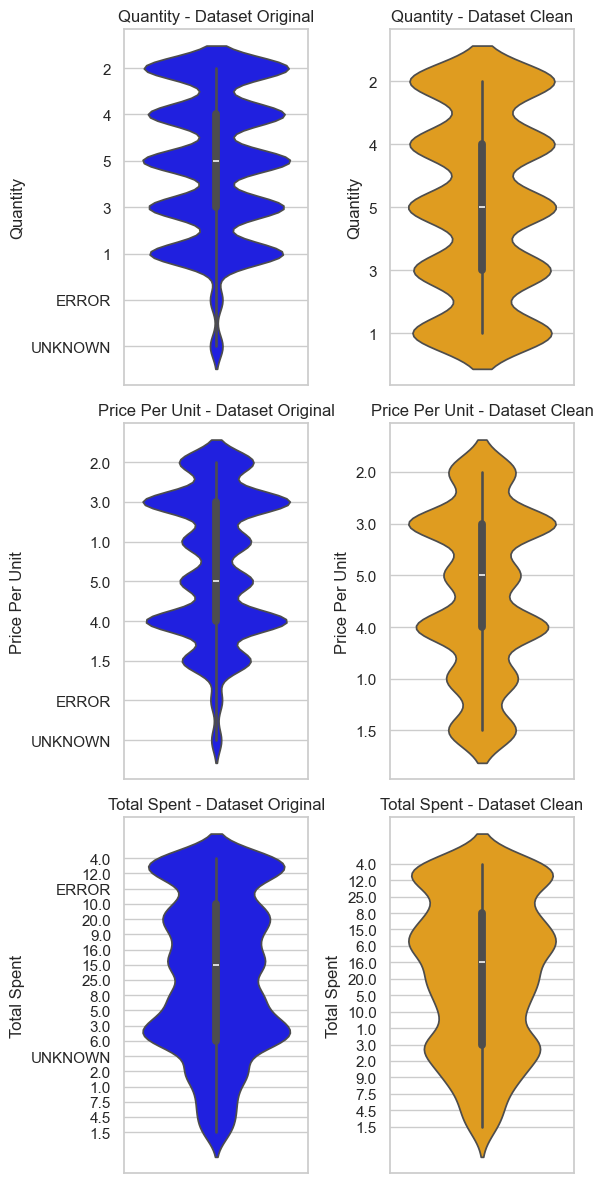

In [18]:
sns.set(style="whitegrid")

columns_of_interest = ['Quantity', 'Price Per Unit', 'Total Spent']
num_columns = len(columns_of_interest)
plt.figure(figsize=(6, 4 * num_columns))

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(num_columns, 2, 2*i-1)
    sns.violinplot(data=df, y=column, color='blue')
    plt.title(f'{column} - Dataset Original')
    

    plt.subplot(num_columns, 2, 2*i)  
    sns.violinplot(data=df_clean, y=column, color='orange')
    plt.title(f'{column} - Dataset Clean')

plt.tight_layout()
plt.show()


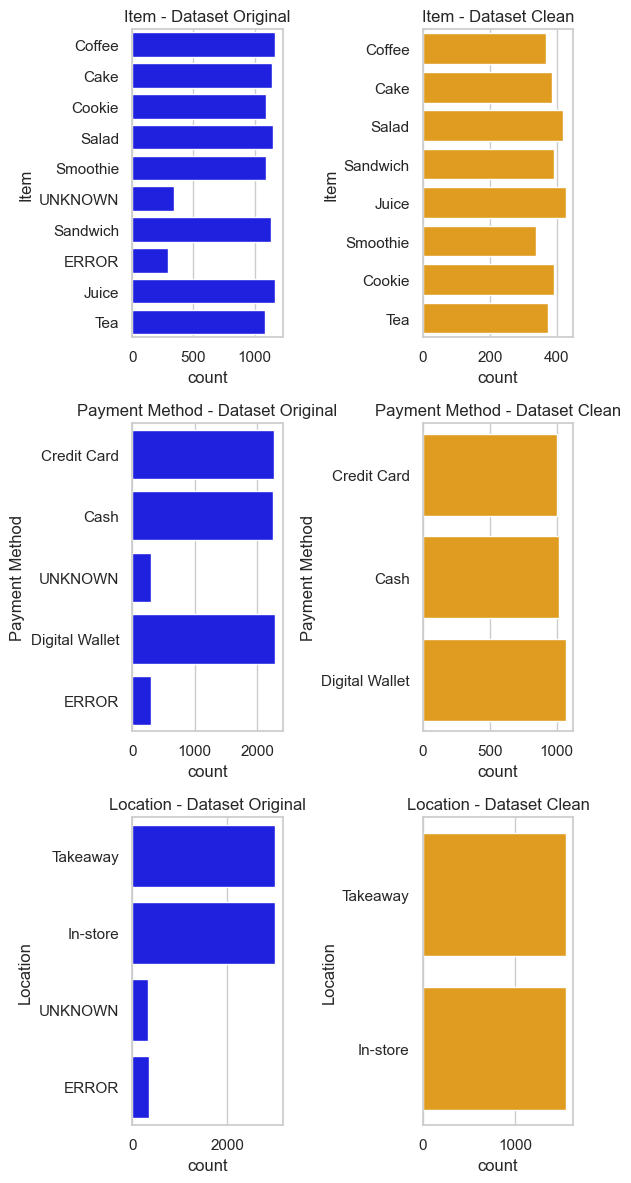

In [14]:

columns_of_interest = ['Item', 'Payment Method', 'Location']

num_columns = len(columns_of_interest)
plt.figure(figsize=(6, 4 * num_columns))

for i, column in enumerate(columns_of_interest):
    
    plt.subplot(num_columns, 2, 2*i + 1)
    sns.countplot(data=df, y=column, color='blue')
    plt.title(f'{column} - Dataset Original')
    
    plt.subplot(num_columns, 2, 2*i + 2)
    sns.countplot(data=df_clean, y=column, color='orange')
    plt.title(f'{column} - Dataset Clean')
    
plt.tight_layout()
plt.show()
